## Linear Regression: Week 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

np.random.seed(42)

In [2]:
df = pd.read_csv("./data/housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
df = df[["median_income", "median_house_value"]]
df.head(10)

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
5,4.0368,269700.0
6,3.6591,299200.0
7,3.1200,241400.0
8,2.0804,226700.0
9,3.6912,261100.0


<Axes: xlabel='median_income', ylabel='Count'>

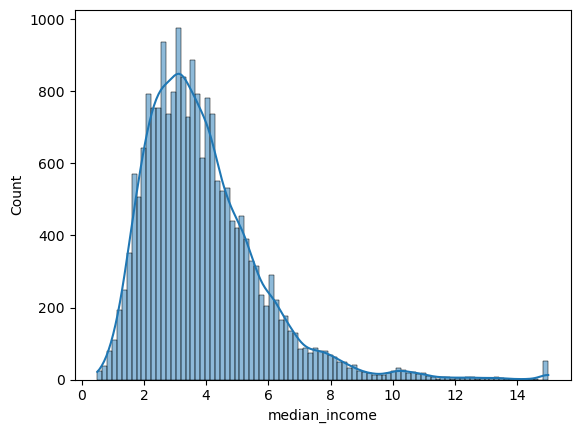

In [4]:
# Plot histogram for visualization
sns.histplot(df["median_income"], kde=True)

<Axes: xlabel='median_house_value', ylabel='Count'>

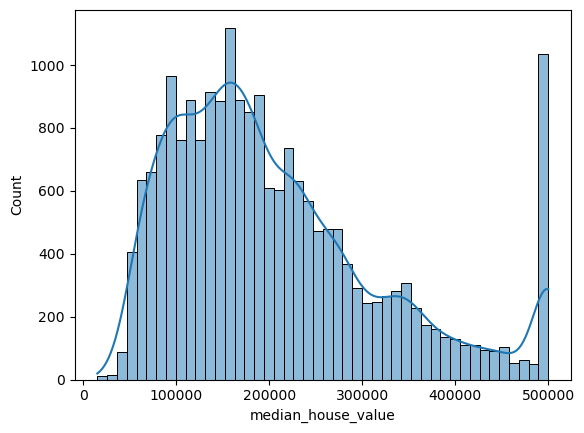

In [5]:
sns.histplot(df["median_house_value"], kde=True)

In [6]:
df.groupby("median_house_value").count().sort_values(
    "median_house_value", ascending=False
).head()

,median_income
median_house_value,
500001.0,965
500000.0,27
499100.0,1
499000.0,1
498800.0,1


<Axes: xlabel='median_income', ylabel='median_house_value'>

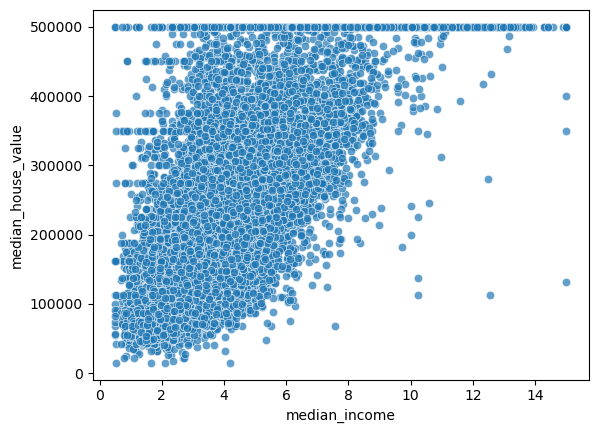

In [7]:
sns.scatterplot(data=df, x="median_income", y="median_house_value", alpha=0.7)

<Axes: ylabel='median_house_value'>

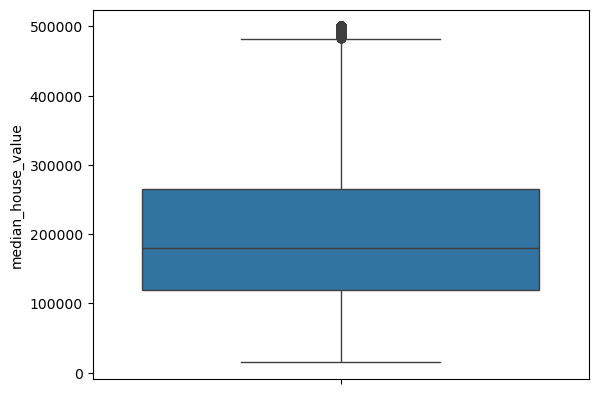

In [8]:
sns.boxplot(df["median_house_value"])

<Axes: ylabel='median_house_value'>

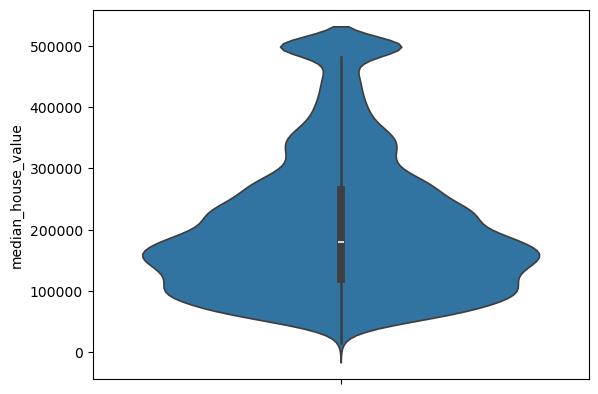

In [9]:
sns.violinplot(df["median_house_value"])

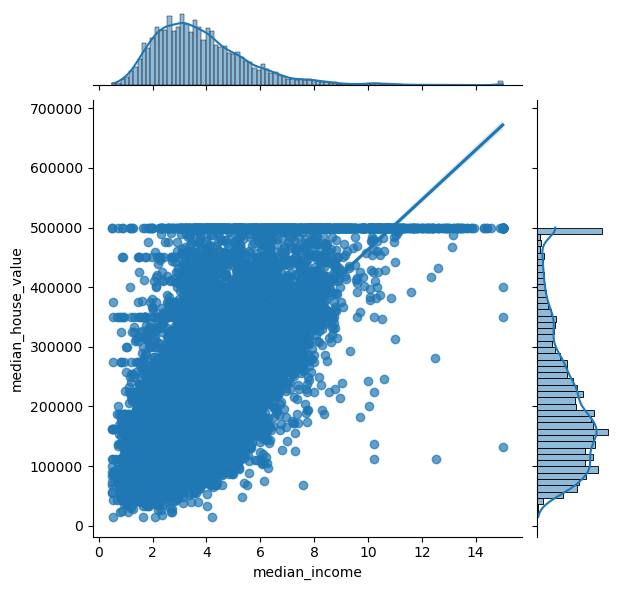

In [10]:
sns.jointplot(
    data=df,
    x="median_income",
    y="median_house_value",
    kind="reg",
    joint_kws={"scatter_kws": dict(alpha=0.7)},
)

### Removing Outliers

In [11]:
df.drop(df[df["median_house_value"] > 500_000].index, inplace=True)

<Axes: ylabel='median_house_value'>

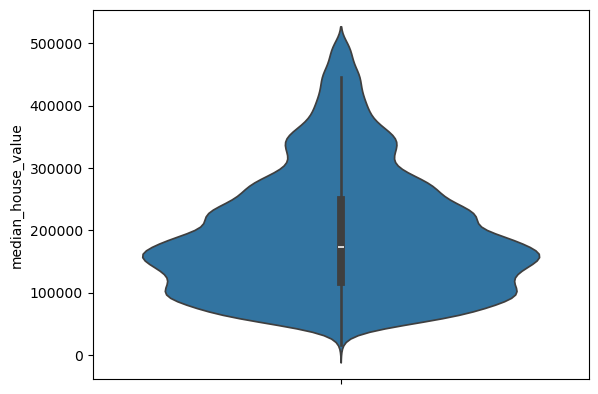

In [12]:
sns.violinplot(df["median_house_value"])

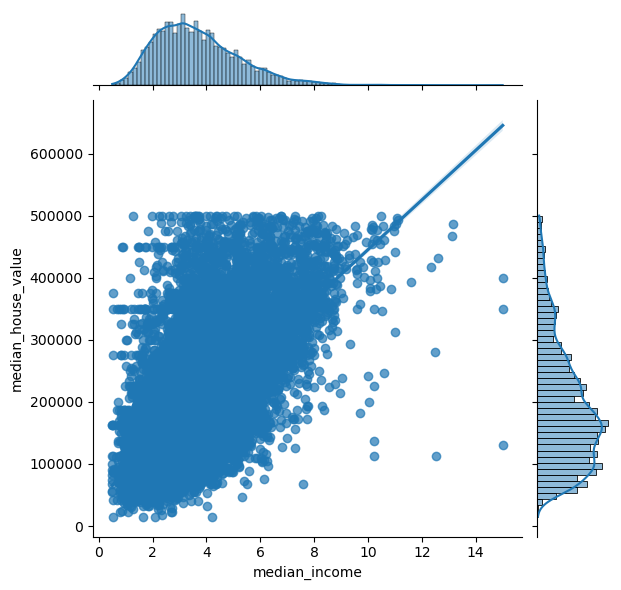

In [13]:
sns.jointplot(
    data=df,
    x="median_income",
    y="median_house_value",
    kind="reg",
    joint_kws={"scatter_kws": dict(alpha=0.7)},
)

In [14]:
df.groupby("median_house_value").count().sort_values(
    "median_house_value", ascending=False
).head()

,median_income
median_house_value,
500000.0,27
499100.0,1
499000.0,1
498800.0,1
498700.0,1


In [15]:
df.corr()

,median_income,median_house_value
median_income,1.000000,0.642611
median_house_value,0.642611,1.000000


In [16]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

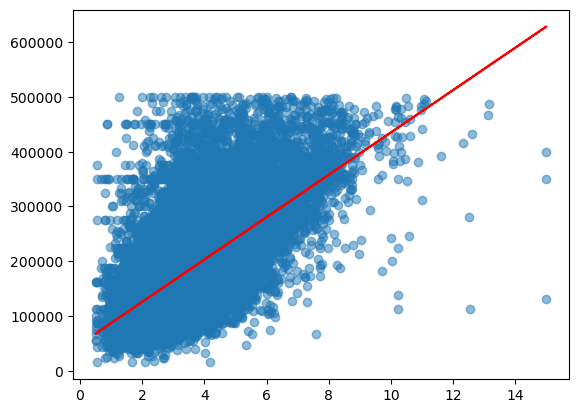

In [18]:
y_hat = regressor.coef_ * X + regressor.intercept_

plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_hat, color="red")

In [19]:
regressor.score(X, y)

0.41211485721472507

In [21]:
r2_score(X_train, y_train)

-18239163258.445774